In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

h_bar = 1.05e-34 # Js
m = 9.109e-31 # kg
sigma = 1e-10 #m
k = 5e10 # m^-1

a_squared = (1j*h_bar)/(2*m)
L = 1e-8 #m 
N = 1000
x0 = L / 2
dx = L/N

x = np.arange(0, L, dx)
kappa = 2 * np.pi * np.fft.fftfreq(N, d = dx)

psi_0 = lambda x_r: np.exp(-(x_r-x0)**2/(2*sigma**2)) * np.exp(1j * k * x_r)

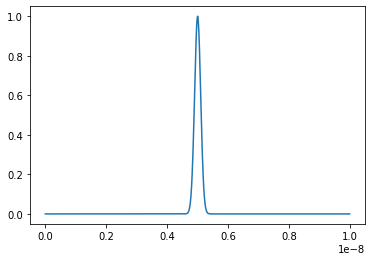

In [9]:
psi0 = psi_0(x)
psi0hat = np.fft.fft(psi0)
psi0hat_ri = np.concatenate((psi0hat.real, psi0hat.imag))
plt.plot(x, abs(psi0))

In [10]:
dt = 1e-16/100
t = np.arange(0, 1e-16, dt)

In [11]:
def rhs_quantum(psihat_ri, t, kappa, alpha_squared):
    psihat = psihat_ri[:N] + 1j * psihat_ri[N:]
    d_psihat = -alpha_squared * (np.power(kappa, 2)) * psihat
    d_psihat_ri = np.concatenate((d_psihat.real, d_psihat.imag)).astype('float64')
    return d_psihat_ri

In [12]:
psihat_ri = odeint(rhs_quantum, psi0hat_ri, t, args = (kappa, a_squared))

In [13]:
psihat = psihat_ri[:,:N] + 1j * psihat_ri[:,N:]
psi = np.zeros_like(psihat)
for i in range(len(t)):
    psi[i,:] = np.fft.ifft(psihat[i,:])
psi = psi.real

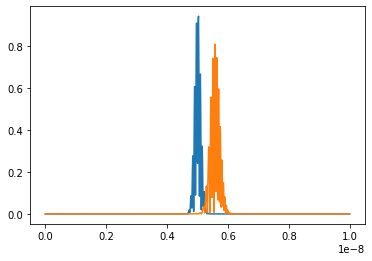

In [14]:
plt.plot(x, abs(psi[0]))
plt.plot(x, abs(psi[-1]))